# Setting up connection to Kaggle

In [0]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Install Kaggle library
!pip install -q kaggle

In [0]:
# Upload Kaggle API token (NOTE: this file needs to be downloaded manually on Kaggle)
from google.colab import files
token = files.upload()

In [0]:
# Navigate to folder containing project
import os
os.chdir("drive/My Drive/COMP 551/Projects/Project3")

In [0]:
# Downlaod data for the modified-mnist challenge
!kaggle competitions download -c modified-mnist

# Preprocessing

In [0]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle 
from google.colab.patches import cv2_imshow
import random
from sklearn.model_selection import train_test_split

In [0]:
def show_single_picture(img):
    """ Plot an image """
    cv2_imshow(img*255)

def resize(image):
    """ Method that standardizes an image by resizing it to a specific height and weight """
    height = 28
    width = 28
    dimension = (height, width)
    return cv2.resize(image, dimension,interpolation=cv2.INTER_LINEAR)

def denoise(img):
    """ Function that smooths out the edges of the picture """
    return cv2.GaussianBlur(img,(5,5),0)

def threshold(img,threshold=0.925):
    """ 
    Clears the background noise from data 
    NOTE: Max value after normalization is 1.0
    (0, 0, 0) represents black
    (255, 255, 255) represents white
    Hence, we want to set everything that is not 1.0 to 0.0 to have a clear black background
    To turn background to white and numbers to black simply add _INV to the 4th argument for the threshold function.
    """
    return cv2.threshold(img,threshold,1,cv2.THRESH_BINARY)

In [0]:
# Read training data
train_img = pd.read_pickle("data/train_max_x.zip", compression="zip")

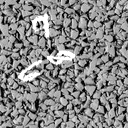

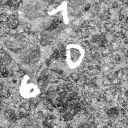

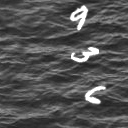

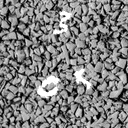

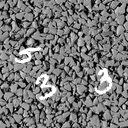

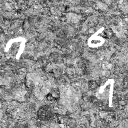

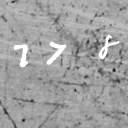

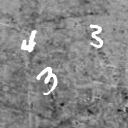

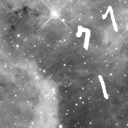

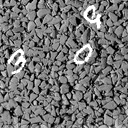

In [0]:
# Show image before preprocessing
numbers = [random.randint(0,len(train_img)) for i in range(10)]

for i in numbers:
  show_single_picture(train_img[i]/255) 

In [0]:
def preprocess_modified_mnist():
    # Read data 
    train_img = pd.read_pickle("data/train_max_x.zip", compression="zip")
    test_img = pd.read_pickle("data/test_max_x.zip", compression="zip")
    train_lbl = pd.read_csv("data/train_max_y.csv")

    # Normalize data
    train_img, test_img = train_img/255.0, test_img/255.0

    for i in range(len(train_img)):
        # Thresholding
        train_img[i] = threshold(train_img[i])[1]

    for i in range(len(test_img)):
        # Thresholding
        test_img[i] = threshold(test_img[i])[1]   

    # Save preprocessed data
    pickle.dump(train_img, open(r"data/preprocessed_train_max_x.pkl","wb"))
    pickle.dump(test_img, open(r"data/preprocessed_test_max_x.pkl","wb"))

# Call preprocessing function
preprocess_modified_mnist()

In [0]:
# Read processed data
train_img = pd.read_pickle("data/preprocessed_train_max_x.pkl")

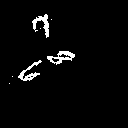

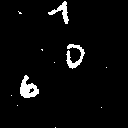

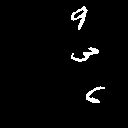

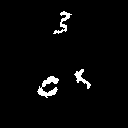

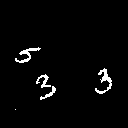

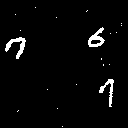

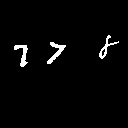

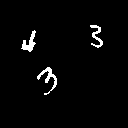

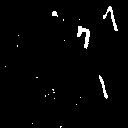

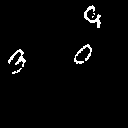

In [0]:
# Show images after preprocessing
for i in numbers:
  show_single_picture(train_img[i]) 

## Exploration

In [0]:
# See if dataset is balanced
df = pd.read_csv("data/train_max_y.csv")
df.describe()

,Id,Label
count,50000.000000,50000.000000
mean,24999.500000,6.949060
std,14433.901067,1.953013
min,0.000000,0.000000
25%,12499.750000,6.000000
50%,24999.500000,7.000000
75%,37499.250000,9.000000
max,49999.000000,9.000000


In [0]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
Id       50000 non-null int64
Label    50000 non-null int64
dtypes: int64(2)
memory usage: 781.4 KB


In [0]:
# Count the number of examples from each class 
count = df.groupby("Label").count()
print(count)

          Id
Label       
0         42
1        421
2       1029
3       1991
4       3171
5       4223
6       6184
7       8866
8      10621
9      13452


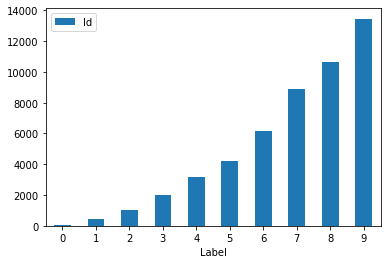

In [0]:
# Plot count per class 
count.plot.bar(rot=0)

## Model Selection

In [0]:
# Create fixed training and validation sets 
x = pd.read_pickle('data/preprocessed_train_max_x.pkl')
y = pd.read_csv("data/train_max_y.csv")['Label']

# Split data for validation
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, shuffle=True)

# Save to csv
pickle.dump(x_train, open(r"data/x_train.pkl", "wb"),protocol=4)
pickle.dump(x_valid, open(r"data/x_valid.pkl", "wb"),protocol=4)
pickle.dump(y_train, open(r"data/y_train.pkl", "wb"),protocol=4)
pickle.dump(y_valid, open(r"data/y_valid.pkl", "wb"),protocol=4)